## <p style="text-align: right;"> &#9989; Dean Cianciolo</p>

# CMSE 202 Final (Section 004 - Fall 2024)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any LLM (e.g. ChatGPT) is forbidden. The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents). Cellphones should be put away in the bags. You are not allowed any headphones (Airpods, over the ear headphones, etc.). Please turn up your screen brightness that the instructor can see your screen (we might ask you to turn it up more - please comply). For any of these violations you will be at risk for receiving a zero on the exam.

**You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource!**

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Dean Cianciolo**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Git (6 points)

This part of the exam will check your understanding of using Git. To avoid merge conflicts and other issues, you will not actually be pushing anything to Github. Rather, you will just be writing the code you would use to accomplish the specified tasks. 

✅ Question 1.1 (3 points): Describe the Git Workflow

The provided diagram illustrates a Git workflow where two commits (m1 and m2) are made in a branch and then merged back into the main branch. Answer the following:
 *	What sequence of Git commands would you need to:
 *	Create a new branch.
 *	Commit changes (m1 and m2) to the branch.
 *	Merge the branch back into the main branch.
 *	Delete the branch.

 <img src="https://raw.githubusercontent.com/wkerzendorf/courses/refs/heads/master/general/data/branching_scenario.png?raw=true" width=400px align="center" style="margin-left: 20px" alt="Git scenario">


In [1]:
### Put your code for Question 1.1 here
git branch branch1
git checkout branch1
git add .
git commit -m "Added test function"
git add .
git commit -m "Edited docstrings"
git checkout main
git merge branch1 main
git branch -d branch1

SyntaxError: invalid syntax (667854253.py, line 2)

✅ Question 1.2 (2 points): Specific Git Commands

Provide the Git command(s) for the following tasks:
	1.	Display the commit history of the current branch in a compact, graphical format. (look online)
	2.	Switch to a branch named feature-branch.

In [6]:
### Put your code for Question 1.2 here
git log 
git checkout feature-branch

✅ Question 1.3 (1 point): Reflecting on Git’s Utility

Did you find value in learning Git during this course? Why or why not?

I found utility in learning about Git, because I use it to collaborate with others on my research team. Using Git allows me to easily send and receive code, and store earlier code in the chance that a new change breaks the current sysstem.

---
## Part 2: Graph for countries in Europe (21 points)

This exercise uses the country_borders.csv dataset, which lists pairs of neighboring countries (borders). The adjacency structure plays a critical role in modeling international relationships. A country’s “neighbors” are those it shares borders with, and this relationship can be modeled as a graph where countries are nodes and borders are edges.

You can download the dataset here:

https://raw.githubusercontent.com/wkerzendorf/courses/refs/heads/master/general/data/country_europe_borders.csv
https://raw.githubusercontent.com/wkerzendorf/courses/refs/heads/master/general/data/country_europe_locations.csv


&#9989; **Question 2.1 (3 points)**: Download the country_europe_borders.csv and country_europe_locations.csv file, load it into a Pandas DataFrame, and display the first and last few rows.

In [3]:
### Put your code for Question 2.1 here
import pandas as pd

borders = pd.read_csv("country_europe_borders.csv")
locations = pd.read_csv("country_europe_locations.csv")
print(borders.head(5))
print(borders.tail(5))
print(locations.head(5))
print(locations.tail(5))

  Country1         Country2
0  Albania       Montenegro
1  Albania           Greece
2  Albania  North Macedonia
3  Albania           Kosovo
4  Andorra           France
         Country1  Country2
169       Ukraine    Poland
170       Ukraine   Romania
171       Ukraine    Russia
172       Ukraine  Slovakia
173  Vatican City     Italy
         Country                    location
0  Åland Islands           (19.9, 60.116667)
1        Albania                    (20, 41)
2        Andorra                 (1.5, 42.5)
3        Austria  (13.33333333, 47.33333333)
4        Belgium            (4, 50.83333333)
         Country                    location
48      Slovakia         (19.5, 48.66666666)
49      Slovenia  (14.81666666, 46.11666666)
50        Sweden                    (15, 62)
51       Ukraine                    (32, 49)
52  Vatican City               (12.45, 41.9)


You should see two columns: `Country1`, `Country2`. We will now create a `networkx` graph using this dataset.

&#9989; **Question 2.2 (4 points)**: **Create a networkx Graph object where each country is a node, and edges represent shared borders**. The resulting graph should have an edge for each entry in the dataset.
One way to do this is to start with an empty `Graph`. 

Then, loop through each row of the dataset and add edges between the two territories listed on each line. There are of course other solutions.

In [5]:
### Put your code for Question 2.2 here
import networkx as nx

graph = nx.Graph()
nodes = locations['Country']
edges = []
for i in range(len(borders['Country1'])):
    edges.append([borders.iloc[i, 0], borders.iloc[i, 1]])

graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

We will now visualize the graph.

&#9989; **Question 2.3 (3 points)**: First, **run the code cell immediately below**. Next, in the code cell after that one, **create a large matplotlib figure** for drawing the graph. Finally, **draw the graph** using `networkx` and set the **positions** of the nodes using the `locations` dictionary . (Partial credit will be given if you don't adjust the figure size or if you can't plot the nodes in the specified locations.) If you did everything correctly, you should get something like this: <img src=https://raw.githubusercontent.com/wkerzendorf/courses/refs/heads/master/general/data/country_borders_europe.png width=400px>

In [6]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
locations_df = pd.read_csv("country_europe_locations.csv").set_index("Country")
locations = {key:eval(value) for key, value in locations_df['location'].to_dict().items()}
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

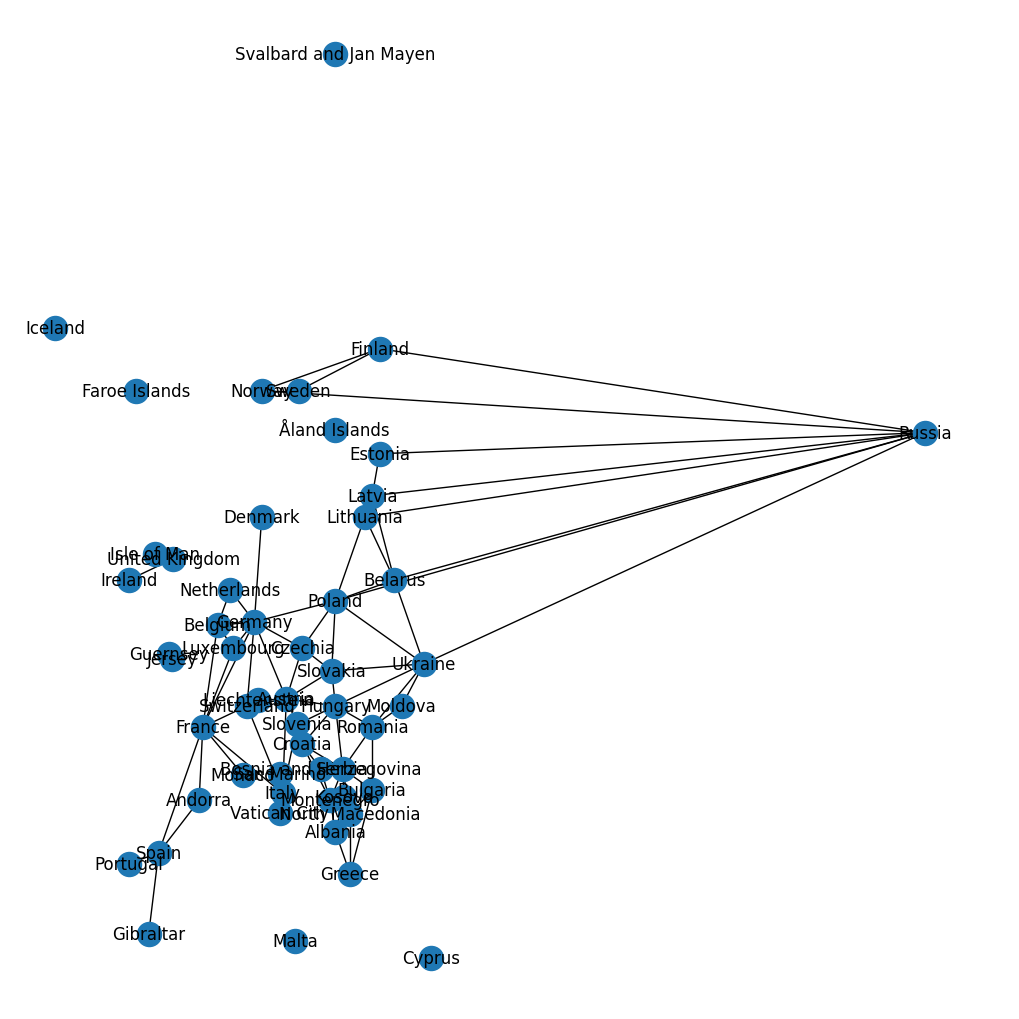

In [13]:
### Put your code for Question 2.3 here
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 10])
nx.draw(graph, pos=locations, with_labels=True)

---
For each part of Questions 2.4, use a short amount of networkx code to find answer. Note that you must use a networkx method to receive credit, and answers based on using the original csv file, the DataFrame, or the plot in Question 2.3 will not receive credit.

Note that if you couldn't create the `CountryGraph` correctly, you can still receive credit on each part of Question 2.4 by writing code that would have given the correct answer if your `CountryGraph` was correct.

&#9989; **Question 2.4.1 (1 point)** How many countries are represented in the graph??

In [14]:
### Put your code for Question 2.4.1 here
print(len(graph.nodes))

53


&#9989; **Question 2.4.1 (1 point)** True or False?: Is France adjacent to Germany?

In [17]:
### Put your code for Question 2.4.1 here
adj = False
for i in graph.edges:
    if 'France' in i and 'Germany' in i:
        adj = True
if adj:
    print('adjacent')

adjacent


✅ **Question 2.4.2 (1 point):** How many countries share borders with Italy?

In [18]:
### Put your code for Question 2.4.2 here
total = 0
for i in graph.edges:
    if 'Italy' in i:
        total += 1
print(total)

6


&#9989; **Question 2.4.3 (2 points)** List all territories that are neighbors with `Austria`. 

**Hint**: The `list()` method and the `all_neighbors()` method in `networkx` will be useful for answering this question.

In [26]:
### Put your code for Question 2.4.3 here
for i in nx.all_neighbors(graph, 'Austria'):
    print(i)

Czechia
Germany
Hungary
Italy
Liechtenstein
Slovakia
Slovenia
Switzerland


&#9989; **Question 2.4.4 (2 points)** What is the shortest path between `Spain` and `Russia`?

In [27]:
### Put your code for Question 2.4.4 here
print(nx.shortest_path(graph, 'Spain', 'Russia'))

['Spain', 'France', 'Germany', 'Poland', 'Russia']


&#9989; **Question 2.4.5 (2 points)**  How many countries share borders with exactly three other countries?

**Hint**: You'll likely want to loop over all territories in `CountryGraph.nodes()` and check which ones have a degree of 3.

In [29]:
### Put your code for Question 2.4.5 here
total = 0
for i in graph.nodes():
    if graph.degree(i) == 3:
        total += 1

print(total)

5


---

&#9989; **Question 2.5 (2 points)**: Suppose some borders allow passage in only one direction (e.g., goods can flow from “Country A” to “Country B” but not the reverse). What networkx class could you use to model this?

<font size=+3>&#9998;</font> **Digraph**

---
## Part 3: Regression analysis on the moons of Saturn (25 points)

In this part of the exam, we will look at data on the moons of Saturn from this Wikipedia page https://en.wikipedia.org/wiki/Moons_of_Saturn#Confirmed. Since you have a very limited time on this exam, I have formatted most of that table into a csv file, which you can download here: `https://raw.githubusercontent.com/wkerzendorf/courses/refs/heads/master/general/data/SaturnMoons.csv`

&#9989; **Question 3.1 (3 points)**: To get started, **download the `SaturnMoons.csv` file and place it in the same directory as your notebook**, then **read in the `SaturnMoons.csv` dataset** and finally **display the first and last few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [31]:
### Put your code for Question 3.1 here
moonData = pd.read_csv("SaturnMoons.csv")
print(moonData.head(5))
print(moonData.tail(5))

  Order  Label        Name Absolute Magnitude Diameter (km) Mass (x10^15 kg)  \
0     1    NaN  S/2009 S 1                 20           0.3         < 0.0001   
1   NaN    NaN  (moonlets)                  —   0.04 to 0.4         < 0.0001   
2     2  XVIII         Pan                9.1          28.2             4.95   
3     3   XXXV     Daphnis                 12           7.6            0.084   
4     4     XV       Atlas               10.7          30.2              6.6   

   Semi-Major Axis (m)  Orbital Period (s)  Inclination  Eccentricity  \
0          117000000.0             40600.0        0.000        0.0000   
1          130000000.0             47500.0        0.000        0.0000   
2          134000000.0             49700.0        0.000        0.0000   
3          137000000.0             51300.0        0.004        0.0000   
4          138000000.0             52000.0        0.003        0.0012   

                            Position Discovery Year  Discoverer  
0             

In the data table you just read in, you should see a table where each row corresponds to one of the many moons of Saturn, and the columns contain several properties of the moons including the `Semi-Major Axis (m)` and `Orbital Period (s)`.

&#9989; **Question 3.2 (4 points)**: **Make a scatter plot** with the `Semi-Major Axis (m)` on the $y$-axis and the `Orbital Period (s)` on the $x$-axis. **Be sure to give your plot a descriptive title and label your axes appropriately.**

Text(0.5, 1.0, 'Semi-Major Axis by Orbital Period')

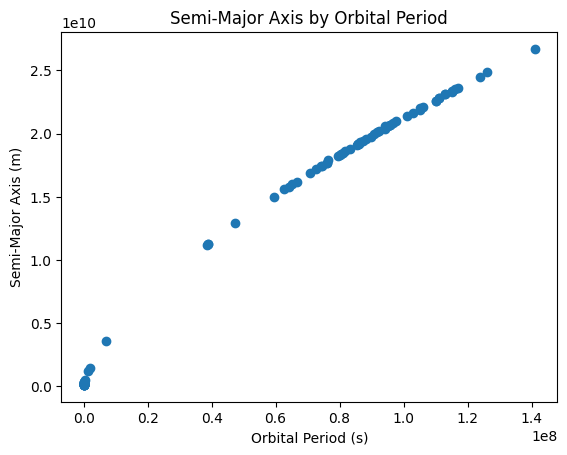

In [32]:
### Put your code for Question 3.2 here
plt.scatter(moonData['Orbital Period (s)'], moonData['Semi-Major Axis (m)'])
plt.xlabel('Orbital Period (s)')
plt.ylabel('Semi-Major Axis (m)')
plt.title('Semi-Major Axis by Orbital Period')

&#9989; **Question 3.3 (3 points)**: Using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `Semi-Major Axis (m)` as the independent variable and `Orbital Period (s)` as the dependent variable. **Display the results summary**.

In [34]:
### Put your code for Question 3.3 here
import statsmodels.api as sm

moonData = sm.add_constant(moonData)
regression = sm.OLS(moonData['Semi-Major Axis (m)'], moonData[['const', 'Orbital Period (s)']])
fit = regression.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Semi-Major Axis (m)   R-squared:                       0.986
Model:                             OLS   Adj. R-squared:                  0.986
Method:                  Least Squares   F-statistic:                     5673.
Date:                 Thu, 05 Dec 2024   Prob (F-statistic):           1.79e-77
Time:                         11:01:42   Log-Likelihood:                -1867.4
No. Observations:                   84   AIC:                             3739.
Df Residuals:                       82   BIC:                             3744.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.953e+08   2.09e+08      4.758      0.000    5.79e+08    1.41e+09
Orbital Period (s)   205.1869      2.724     75.318      0.000     199.767     210.606
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.424
Skew:                           0.145   Prob(JB):                        0.809
Kurtosis:                       2.808   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.4 (2 points)**: **Based solely on the OLS results summary**, does a linear model fit this data well? Briefly justify your answer using details from the OLS results summary.

<font size=+3>&#9998;</font> Yes, as the R-squared value is 0.986, which is very close to a perfect value of 1.

&#9989; **Question 3.5 (3 points)**: Use `plot_regress_exog` to **make a plot of the distribution of residuals** in your model fit. (It's ok if you leave the other three plots in the output.) **Explicitly resize your figure** so that it is large enough to see everything clearly.

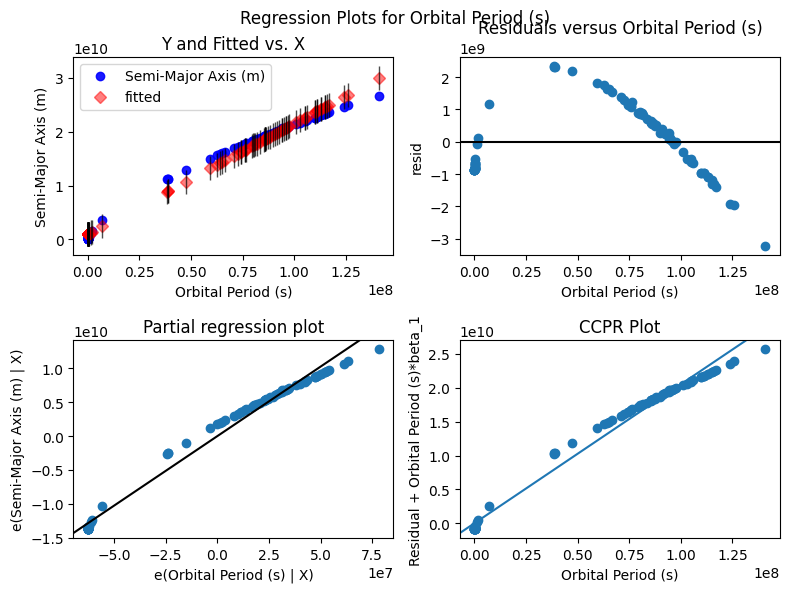

In [39]:
### Put your code for Question 3.5 here
fig = plt.figure(figsize=(8, 6))
fig = sm.graphics.plot_regress_exog(fit, 'Orbital Period (s)', fig=fig)

&#9989; **Question 3.6 (2 points)**: **Based solely on the residual plot** (and not on any Physics knowledge or reading ahead in this exam), is a linear model a good choice for this data, or do you think it would be easy to find a simple nonlinear model that fits the data better? Briefly justify your answer using details about the residual plot.

<font size=+3>&#9998;</font> It does not seem to be a good choice, as there are high residuals (on the order of magnitude of 10^9) for many data points.

---

After seeing a clear trend in this data, you decide to tell your Astrophysics major friend about your exciting discovery. Unfortunately, your friend tells you that this is simply a consequence of Kepler's Third Law, and that you didn't discover anything new. :(

Kepler's Third Law states that when a body with mass $m$ orbits another body with mass $M$, the length of the semi-major axis $a$ and the orbital period $T$ are related by the equation $$a^3 = \dfrac{G(M+m)}{4\pi^2}T^2$$ where $G = 6.6743 \times 10^{-11} \tfrac{\text{meters}^3}{\text{kilograms} \cdot \text{seconds}^2}$ is the universal gravitational constant. Since the mass of Saturn is much larger than the masses of Saturn's moons, we can make the approximation $$a^3 \approx \dfrac{GM}{4\pi^2}T^2.$$ This means that $a^3$ and $T^2$ have a linear relationship!



&#9989; **Question 3.7 (3 points)**: **Make another scatter plot** of $a^3$ vs. $T^2$, i.e. plot the `Semi-Major Axis (m)` **raised to the third power** on the $y$-axis and the `Orbital Period (s)` **raised to the second power** on the $x$-axis. Again, be sure to **give your plot a descriptive title and label your axes appropriately**.

Text(0.5, 1.0, 'Semi-Major Axis Cubed by Orbital Period Squared')

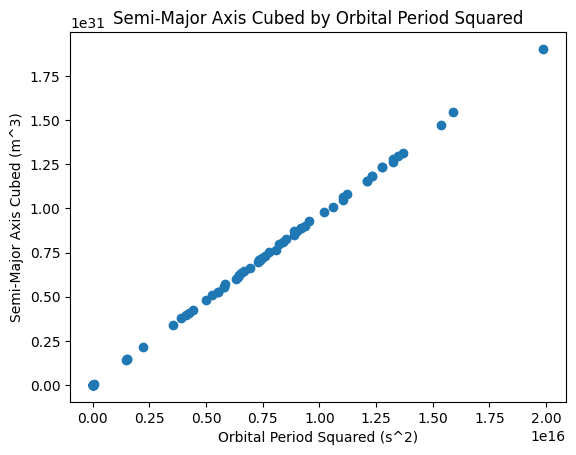

In [40]:
### Put your code for Question 3.7 here
plt.scatter(moonData['Orbital Period (s)'] ** 2, moonData['Semi-Major Axis (m)'] ** 3)
plt.xlabel('Orbital Period Squared (s^2)')
plt.ylabel('Semi-Major Axis Cubed (m^3)')
plt.title('Semi-Major Axis Cubed by Orbital Period Squared')

&#9989; **Question 3.8 (3 points)**: First, visually check that the transformed data points appear to have a more linear relationship than the original data points you plotted in Question 3.2. Then, using the `OLS` method in `statsmodels`, **perform ordinary least squares regression** with `Semi-Major Axis (m)` **raised to the third power** as the independent variable and `Orbital Period (s)` **raised to the second power** as the dependent variable, i.e. $a^3$ vs $T^2$. **Display the results summary**.

In [41]:
### Put your code for Question 3.8 here
moonData['Semi-Major Axis Cubed (m^3)'] = moonData['Semi-Major Axis (m)'] ** 3
moonData['Orbital Period Squared (s^2)'] = moonData['Orbital Period (s)'] ** 2
regression = sm.OLS(moonData['Semi-Major Axis Cubed (m^3)'], moonData[['const', 'Orbital Period Squared (s^2)']])
fit = regression.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Semi-Major Axis Cubed (m^3)   R-squared:                       1.000
Model:                                     OLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                       nan
Date:                         Thu, 05 Dec 2024   Prob (F-statistic):                nan
Time:                                 11:09:09   Log-Likelihood:                -5675.2
No. Observations:                           84   AIC:                         1.135e+04
Df Residuals:                               83   BIC:                         1.135e+04
Df Model:                                    0                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0955   7.52e-05   1270.355      0.000       0.095       0.096
Orbital Period Squared (s^2)  9.617e+14   7.57e+11   1270.355      0.000     9.6e+14    9.63e+14
==============================================================================
Omnibus:                       20.122   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.434
Skew:                           0.804   Prob(JB):                     2.24e-10
Kurtosis:                       6.180   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

&#9989; **Question 3.9 (2 points)**: Recall that Kepler's Third Law states that $a^3 \approx \dfrac{GM}{4\pi^2}T^2$, i.e., $a^3$ and $T^2$ have a linear relationship with $\text{slope} = \dfrac{GM}{4\pi^2}$ where $G = 6.6743 \times 10^{-11} \tfrac{\text{meters}^3}{\text{kilograms} \cdot \text{seconds}^2}$. Using this along with the slope you obtained from Question 3.8, **estimate the mass of Saturn in kilograms**. 

Note: If you aren't familiar with how to do calculations with units, don't worry. We've handled all the unit conversions for you, so you can just ignore the units on everything.

In [47]:
### Put your code for Question 3.9 here
import numpy as np
print((fit.params['Orbital Period Squared (s^2)'] * 4 * np.pi ** 2) / (6.6743e-11))

5.688664273619026e+26


Remark: This method of estimating the mass of a planet is cheaper and more effective than asking the planet nicely to step on a scale.

<img src="https://spaceplace.nasa.gov/review/planets-weight/planets-weight1.en.png" width=200px alt="Image credit: https://spaceplace.nasa.gov/planets-weight/en/">

---
## Part 4: Support vector machine (SVM) classification (22 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to identify wine types based on various wine measurements. We will be using the UC Irvine Machine Learning Repository Wine Datasets. More info about this dataset can be found here https://archive.ics.uci.edu/ml/datasets/wine. 

&#9989; To get started, **run the code cell below**. This loads the wine dataset from `sklearn.datasets`, stores the features into a numpy array called `wine_features` and stores the class labels into a numpy array called `wine_labels`

In [48]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
from sklearn.datasets import load_wine
wine_dataset = load_wine()
wine_features = wine_dataset.data
wine_labels = wine_dataset.target
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 4.1 (2 points)**: To verify that the dataset is loaded in properly, **display the numpy arrays `wine_features` and `wine_labels`**. Also, **display the shape of both of these arrays**. 

If everything worked properly, you should find that the shape of `wine_features` is (178,13) and the shape of `wine_labels` is (178,) 

In [52]:
### Put your code for Question 4.1 here
print(wine_features)
print(wine_labels)
print(wine_features.shape)
print(wine_labels.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
(178,)


Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.2 (4 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.7` and `random_state` of `161803`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to.

In [54]:
### Put your code for Question 4.2 here
from sklearn.model_selection import train_test_split

train_vectors, test_vectors, train_labels, test_labels = train_test_split(wine_features, wine_labels, train_size = 0.7, test_size = 0.3, random_state=161803)
print(train_vectors.shape)
print(test_vectors.shape)
print(train_labels.shape)
print(test_labels.shape)

(124, 13)
(54, 13)
(124,)
(54,)



&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=10.` Then **fit your training set** and use the resulting fit to **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [56]:
### Put your code for Question 4.3 here
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

svc = SVC(C=10, kernel='linear')
svc = svc.fit(train_vectors, train_labels)
pred_labels = svc.predict(test_vectors)
print(confusion_matrix(test_labels, pred_labels))
print(classification_report(test_labels, pred_labels))

[[18  0  0]
 [ 0 22  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.96      0.98        23
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



&#9989; **Question 4.4 (3 points)**: Interpret the output of your classification report and the confusion matrix by answering these three questions (provide at least 1 or 2 sentences each for full credit): 
* Explain in a few sentences what you observe in the confusion matrix. 
* Would you consider this a good or a bad classifier?
* Which quantity from the classification report did you use to make this judgement?

<font size=+3>&#9998;</font> I observe from the confusion matrix that the model identified all but one of the wines in the testing sample as the correct category. The model identified this wine as a '3', when in reality it is a '2'. I would consider this a very good classifier as it has a 98% accuracy. I used the accuracy score from the classification report to make this judgement.

---

&#9989; **Question 4.5 (1 point)**: Suppose we wanted to try fitting a Support Vector Classifier for multiple choices of the kernel function and multiple choices for the values of the hyperparameter(s) (instead of just using a `linear` kernel with `C=10`). We could write code with nested for loops to repeat the procedure with every combination of kernel function and hyperparameter value(s) we wanted to try. Name a method built into sklearn that will do this automatically. (We used this on an in-class assignment).

<font size=+3>&#9998;</font> GridSearchCV

&#9989; **Question 4.6 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear classifier. One classifier was generated via the Perceptron Learning Algorithm, and the other used a Support Vector Classifier. Which one is which? **Justify your answer!**

Classifier A          | | Classifier B
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/R2BBsDC/Datapoints1-A.png)  | |  ![](https://i.ibb.co/mb9vcq4/Datapoints1-B.png)

<font size=+3>&#9998;</font> Classifier B is the SVC, while classifier A is the Perceptron. I know this is the case because SVMs seek to maximize the margin between the two categories. We can see that in Classifier B, the line is placed directly in the middle of both categories. On the other hand, Classifier A's line is placed much closer to the red category than the blue category, and is not equidistant from all of the closest datapoints to the middle values. This indicates a perceptron, as perceptrons do not try to maximize the margin.

&#9989; **Question 4.7 (3 points)**: Both of the images below show the same two-dimensional dataset with two classes (solid blue squares and unfilled red circles) along with the decision boundary of a linear Support Vector Classifier. One used the hyperparameter `C = 0.1`, and the other used the hyperparameter `C = 1000`. Which one is which? **Justify your answer!**

Classifier X          | | Classifier Y
:-------------------------:|:---:|:-------------------------:
![](https://i.ibb.co/7pPCRwh/Datapoints2-A.png)  | |  ![](https://i.ibb.co/LSMBXzd/Datapoints2-B.png)

<font size=+3>&#9998;</font> Classifier Y used the hyperparameter C = 0.1. I know this because small values of C allow for some errors in the model, but are able to lower the effect of outliers. We see that classifier X properly classifies all data points, but the one outlier point of each sample causes the line to shift a lot in one direction - indicative of the high C = 1000 value.

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.